<a href="https://colab.research.google.com/github/CodeByJJY/RunningAppByJJY/blob/main/All_Possible_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.5 MB/s eta 0:00:00


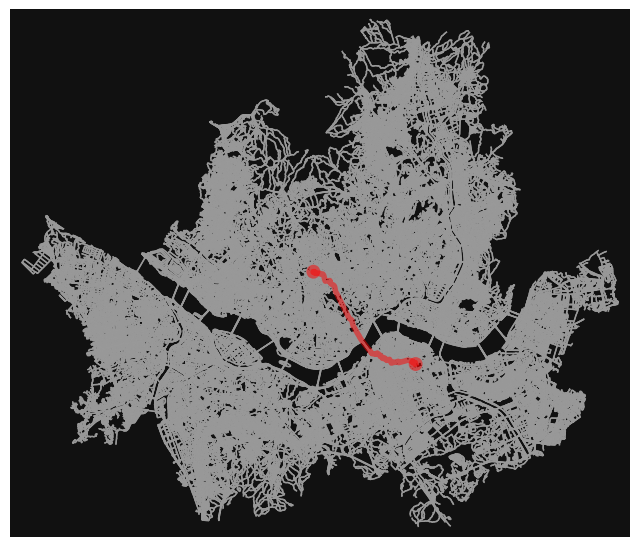

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 장소 이름으로 그래프 생성
place_name = "Seoul, South Korea"
graph = ox.graph_from_place(place_name, network_type="walk")

# 시작점과 도착점 설정 (위도, 경도)
start_point = (37.5665, 126.9780) # 서울 시청
end_point = (37.5173, 127.0474) # 코엑스

# 시작점과 도착점에 가장 가까운 노드 찾기
start_node = ox.nearest_nodes(graph, start_point[1], start_point[0])
end_node = ox.nearest_nodes(graph, end_point[1], end_point[0])

# 최단 경로 계산 (A* 알고리즘 사용)
route = nx.shortest_path(graph, start_node, end_node, weight="length")

# 지도에 경로 표시
fig, ax = ox.plot_graph_route(graph, route, node_size=0)
plt.show()


Trying location: 서울특별시 중구 세종대로 110
Number of nodes: 1390
Number of edges: 3306
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: Seoul City Hall, Seoul, South Korea
Number of nodes: 1376
Number of edges: 3270
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: (37.5663, 126.9784)
Error: Found no graph nodes within the requested polygon.
Please check the location, distance, or network type.

Trying location: 서울특별시 용산구 한강대로 405 서울역
Number of nodes: 1959
Number of edges: 5105
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: (37.5546, 126.9708)
Number of nodes: 160
Number of edges: 289
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'


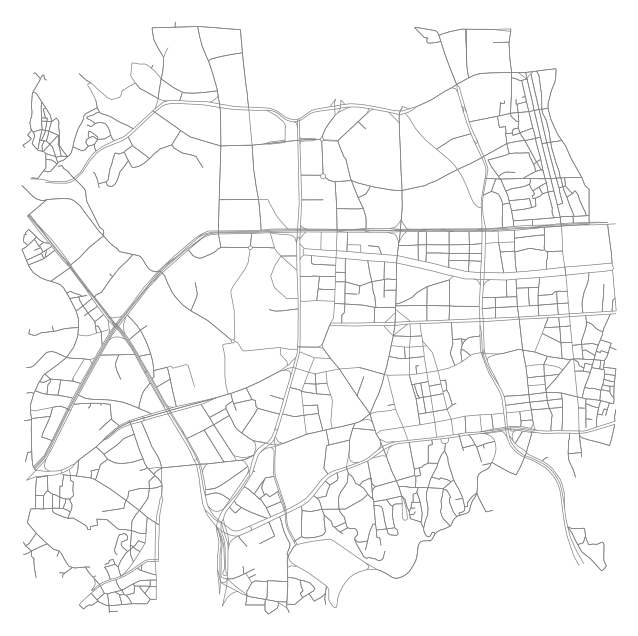

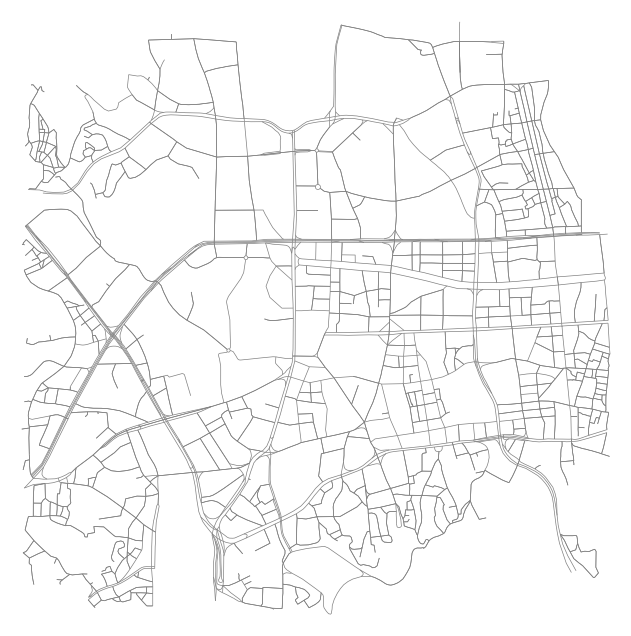

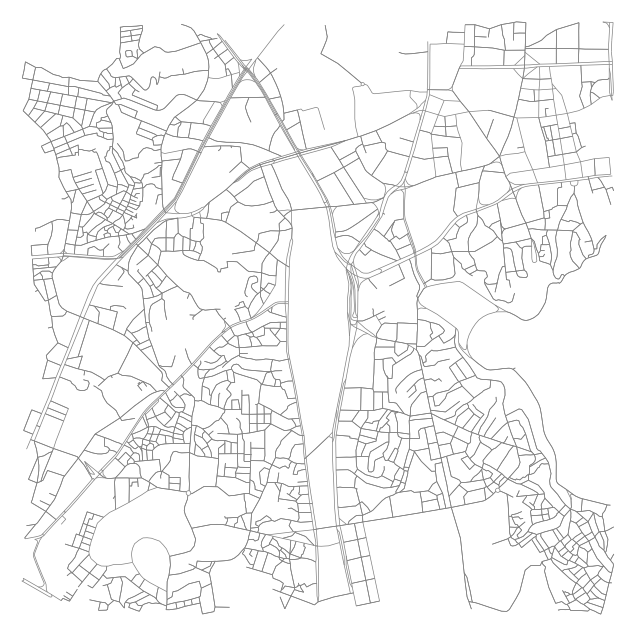

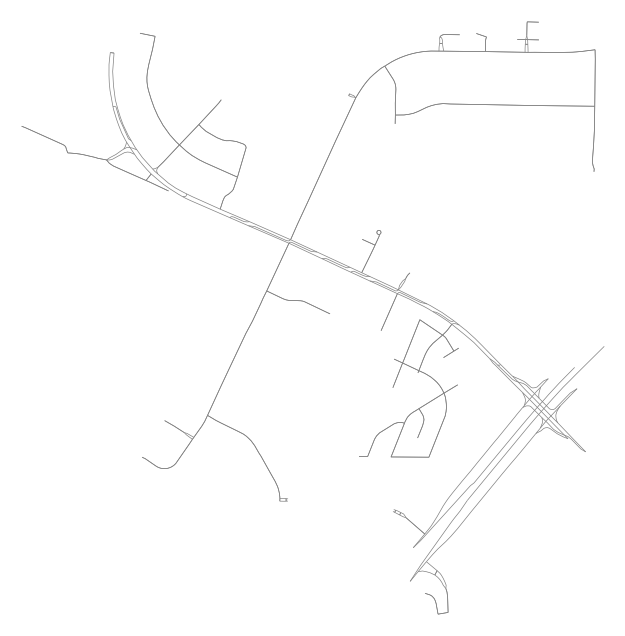

In [13]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

def plot_local_road(location, distance=1000, network_type='drive', savefig=False):
    """
    지정한 위치를 중심으로 반경 내의 도로를 시각화하는 함수 (좌표 사용 및 반경 지정 기능 추가)
    """
    try:
        # 위치를 좌표로 변환 (Nominatim 에러 처리)
        try:
            y, x = ox.geocode(location)
        except Exception as e:
            print(f"Geocoding error: {e}")
            print("Please provide a more specific location or use coordinates directly.")
            return

        # 좌표를 중심으로 그래프 생성 (반경 지정)
        G = ox.graph_from_point((y, x), dist=distance, network_type=network_type)

        if not G.nodes:
            raise ValueError("No nodes found within the specified area. Try increasing the distance or changing the network type.")

        # 중심 노드 찾기
        center_node = ox.nearest_nodes(G, x, y)

        # 그래프 정보 출력
        print("Number of nodes:", len(G.nodes))
        print("Number of edges:", len(G.edges))

        # 그래프 시각화
        fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False, bgcolor='w', edge_color='gray', edge_linewidth=0.5, node_color='r')
        nx.draw_networkx_nodes(G, pos=ox.get_node_coordinates(G), nodelist=[center_node], node_size=100, node_color='r', ax=ax)

        if savefig:
            plt.savefig("map.png")
        plt.show()

    except ValueError as e:
        print(f"Error: {e}")
        print("Please check the location, distance, or network type.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# 예시 실행 (좌표 직접 사용 예시 추가)
locations = [
    "서울특별시 중구 세종대로 110",  # 상세 주소
    "Seoul City Hall, Seoul, South Korea", #영문 주소
    (37.5663, 126.9784),        # 서울시청 좌표 (위도, 경도) - **가장 권장되는 방식**
    "서울특별시 용산구 한강대로 405 서울역", #서울역 상세주소
    (37.5546, 126.9708)
]

for location in locations:
    print(f"\nTrying location: {location}")
    plot_local_road(location, distance=1500, network_type='drive', savefig=True) #network_type을 drive로 변경. bike 또는 walk로도 시도 가능.